In [1]:
# Allows imports from other packages in the project
import sys
import os
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)

In [2]:
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt

In [3]:
snp_info_path = "../data/snp_info.csv"
info = (
    pd.read_csv(snp_info_path, index_col=0)
    .set_index("Symbol")
)

In [4]:
info

,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
Symbol,,,,,,,,
MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
XYL,Xylem Inc.,reports,Industrials,Industrial Machinery,"White Plains, New York",2011-11-01,1524472,NaN
YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN


## Build the Market Graph

Using the most liquid 10 stocks of 8 particular sectors in the S&P 500 Index, we build a market graph, where the vertices are the assets. The edges between assets are calculated according to the correlation of their returns.

Close price data within the period `2016-01-01 - 2018-01-01` is used to build the graph.

In [5]:
stocks_by_sector_df = pd.read_csv('../data/stocks_by_sector.csv')
stocks_by_sector_df

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology
0,T,AMZN,WMT,MRO,BAC,PFE,CSX,AAPL
1,GOOGL,F,KO,KMI,WFC,MRK,GE,AMD
2,GOOG,GM,KR,XOM,C,GILD,DAL,NVDA
3,CMCSA,EBAY,PG,HAL,RF,BMY,AAL,MU
4,VZ,SBUX,MDLZ,WMB,JPM,BSX,CPRT,MSFT
5,NFLX,NKE,MO,COP,KEY,ABT,LUV,INTC
6,DIS,M,MNST,SLB,MS,CVS,FAST,CSCO
7,IPG,MGM,COTY,DVN,HBAN,ABBV,CAT,HPE
8,EA,TJX,WBA,CVX,SCHW,JNJ,JCI,ORCL
9,NWSA,TGT,PM,MPC,SYF,MDT,UAL,AMAT


In [6]:
tickers = stocks_by_sector_df.values.flatten().tolist()

close_df = pd.DataFrame(columns=tickers)
for ticker in tickers:
    stock_data = yf.download(ticker, start='2016-01-02', end='2019-01-01')
    close_df[ticker] = stock_data["Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
# Check for NaN values
nan_columns = close_df.columns[close_df.isna().any()].tolist()
if len(nan_columns) > 0:
    raise ValueError(f"Dataframe contains NaN values in columns: {nan_columns}")

In [8]:
logpx = np.log(close_df)
returns = logpx.diff().dropna()
returns

,T,AMZN,WMT,MRO,BAC,PFE,CSX,AAPL,GOOGL,F,...,JCI,ORCL,NWSA,TGT,PM,MPC,SYF,MDT,UAL,AMAT
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.006963,-0.005036,0.023477,-0.004691,0.000000,0.007173,-0.010133,-0.025379,0.002748,-0.018058,...,-0.012025,-0.003082,-0.033875,0.017387,0.009950,-0.012569,0.005662,0.002899,-0.009940,0.001082
2016-01-06,-0.015441,-0.001800,0.009963,-0.123284,-0.021533,-0.017872,-0.046501,-0.019764,-0.002893,-0.045479,...,-0.009597,0.005038,-0.004710,-0.010207,-0.000228,-0.037862,-0.006999,0.002760,0.002539,-0.041972
2016-01-07,-0.016280,-0.039841,0.023022,-0.055595,-0.036736,-0.006666,-0.031259,-0.043121,-0.024436,-0.031773,...,-0.025722,-0.022016,-0.023081,-0.002703,-0.006853,-0.015097,-0.026433,-0.023771,-0.047677,-0.029768
2016-01-08,0.000895,-0.001465,-0.023179,-0.030450,-0.019545,-0.012821,-0.005945,0.005274,-0.013710,-0.012678,...,-0.001650,-0.011193,0.012800,-0.034424,-0.006208,-0.038229,-0.009662,-0.008503,-0.014160,-0.024707
2016-01-11,0.012150,0.017456,0.010645,-0.073142,0.007211,0.002256,0.001702,0.016063,0.002951,0.018175,...,0.000330,0.008334,-0.029853,0.014465,0.027975,-0.010227,-0.004866,-0.010628,-0.005217,-0.006573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.034133,-0.024613,-0.015149,-0.060532,-0.027768,-0.033466,-0.032482,-0.026215,-0.006660,-0.053584,...,-0.033118,-0.030225,-0.015518,0.006847,-0.003631,-0.043587,-0.014775,-0.032113,-0.029269,-0.044527
2018-12-26,0.025975,0.090254,0.052103,0.112680,0.058941,0.039647,0.049147,0.068053,0.062189,0.028426,...,0.042238,0.043545,0.028120,0.056228,0.013401,0.071567,0.042823,0.032790,0.057467,0.055355
2018-12-27,0.002490,-0.006315,0.012967,0.008433,0.010726,0.015522,0.005494,-0.006511,0.004808,0.000000,...,-0.001009,0.008486,0.002680,-0.006162,-0.002696,0.012772,0.012028,0.011104,-0.009111,0.029267


## Initial Weights

In [9]:
corr_matrix = returns.corr()

weight_matrix_init = corr_matrix.copy()
for i in range(len(weight_matrix_init)):
    weight_matrix_init.iloc[i,i] = 0

# Get rid of very weak edges
min_weight = 0.05
print('Edges deleted: ', (weight_matrix_init < min_weight).sum().sum())
weight_matrix_init[weight_matrix_init < min_weight] = 0
weight_matrix_init

Edges deleted:  98


,T,AMZN,WMT,MRO,BAC,PFE,CSX,AAPL,GOOGL,F,...,JCI,ORCL,NWSA,TGT,PM,MPC,SYF,MDT,UAL,AMAT
T,0.000000,0.142229,0.265786,0.156229,0.212288,0.278671,0.212170,0.207031,0.202502,0.281275,...,0.213637,0.213059,0.208989,0.220788,0.257834,0.152031,0.214620,0.201221,0.187362,0.180699
AMZN,0.142229,0.000000,0.158254,0.253349,0.316219,0.252083,0.314517,0.538599,0.682597,0.219118,...,0.260905,0.365092,0.324694,0.122954,0.140821,0.330573,0.249910,0.351677,0.245099,0.427138
WMT,0.265786,0.158254,0.000000,0.121774,0.168378,0.311755,0.206998,0.204215,0.186346,0.182705,...,0.229656,0.222069,0.225392,0.418069,0.190087,0.147508,0.197286,0.223172,0.150455,0.210991
MRO,0.156229,0.253349,0.121774,0.000000,0.413884,0.222186,0.356662,0.247469,0.236956,0.347677,...,0.244178,0.243438,0.363080,0.162021,0.088530,0.496472,0.264794,0.213812,0.221680,0.264819
BAC,0.212288,0.316219,0.168378,0.413884,0.000000,0.381993,0.433126,0.362066,0.376547,0.492307,...,0.378356,0.396267,0.424347,0.209816,0.052268,0.459181,0.592050,0.300532,0.438933,0.419131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MPC,0.152031,0.330573,0.147508,0.496472,0.459181,0.334044,0.356248,0.338487,0.399509,0.322763,...,0.263395,0.270674,0.348894,0.209397,0.077452,0.000000,0.333564,0.292346,0.304202,0.337946
SYF,0.214620,0.249910,0.197286,0.264794,0.592050,0.310182,0.353510,0.309094,0.262871,0.403688,...,0.306790,0.270174,0.369418,0.219322,0.083574,0.333564,0.000000,0.238214,0.369824,0.301494
MDT,0.201221,0.351677,0.223172,0.213812,0.300532,0.381055,0.244533,0.324724,0.413312,0.220703,...,0.309900,0.317275,0.308185,0.122639,0.184369,0.292346,0.238214,0.000000,0.254339,0.389025
UAL,0.187362,0.245099,0.150455,0.221680,0.438933,0.219456,0.355533,0.323328,0.310846,0.344269,...,0.280884,0.284800,0.284484,0.193608,0.133352,0.304202,0.369824,0.254339,0.000000,0.341124


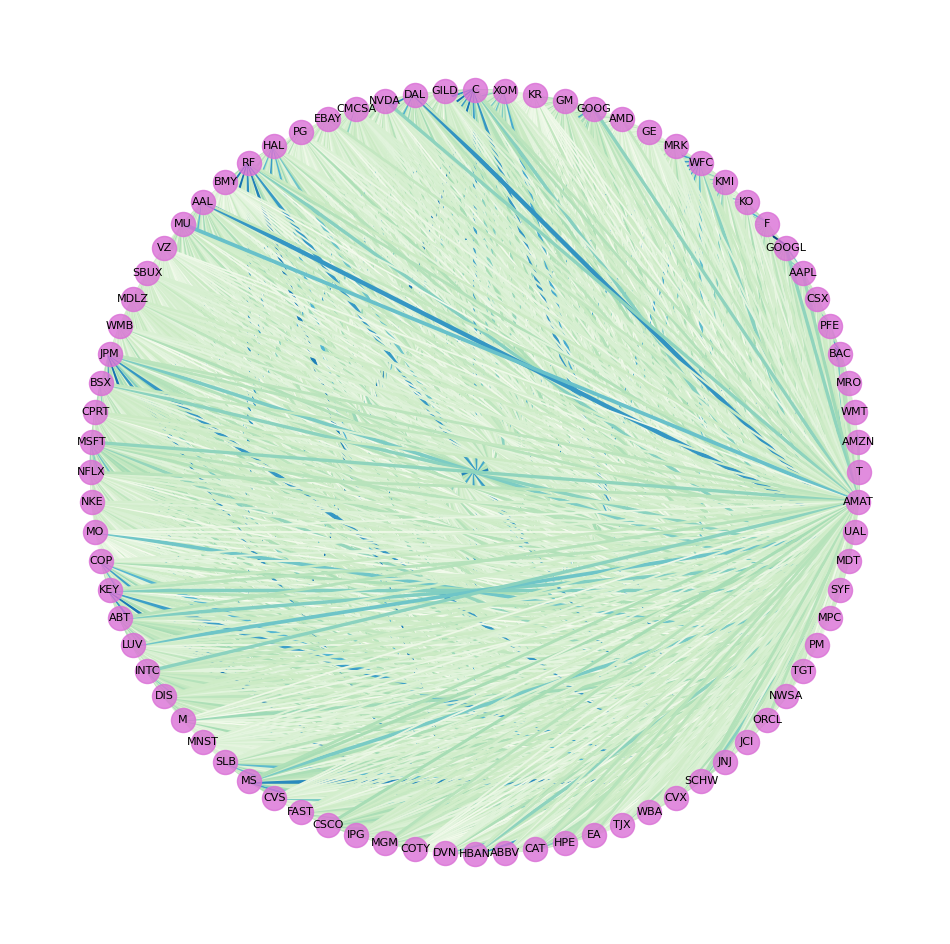

In [10]:
from grtel.graphs import plot_graph

fig, ax = plt.subplots(1,1, figsize=(12,12))
plot_graph(
    weight_matrix_init,
    min_correlation=0.0,
    layout="circular",
    ax=ax,
)


## Portfolio Cuts

In [11]:
from grtel.portfolio_cuts import portfolio_cuts

weight_matrices = portfolio_cuts(weight_matrix_init)

In [12]:
ww = pd.concat(weight_matrices).fillna(0)
market_matrix_after_cuts = weight_matrix_init.copy()
market_matrix_after_cuts[ww.columns] = ww

market_matrix_after_cuts


,T,AMZN,WMT,MRO,BAC,PFE,CSX,AAPL,GOOGL,F,...,JCI,ORCL,NWSA,TGT,PM,MPC,SYF,MDT,UAL,AMAT
T,0.000000,0.142229,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.202502,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
AMZN,0.142229,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.682597,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
WMT,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.418069,0.0,0.000000,0.00000,0.0,0.0,0.0
MRO,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.363080,0.000000,0.0,0.496472,0.00000,0.0,0.0,0.0
BAC,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.433126,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.59205,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MPC,0.000000,0.000000,0.0,0.496472,0.00000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.348894,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
SYF,0.000000,0.000000,0.0,0.000000,0.59205,0.0,0.353510,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
MDT,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
UAL,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0


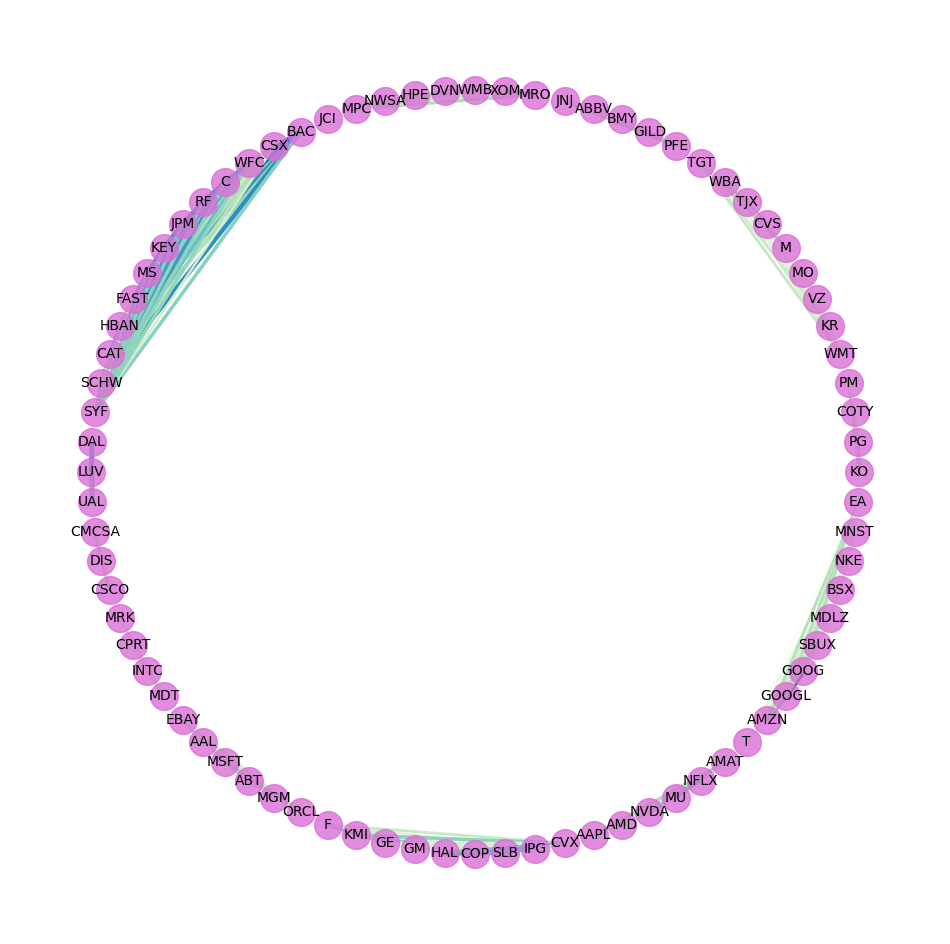

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
plot_graph(
    ww,
    ax=ax,
    layout="circular",
    node_size=400,
    label_size=10
)

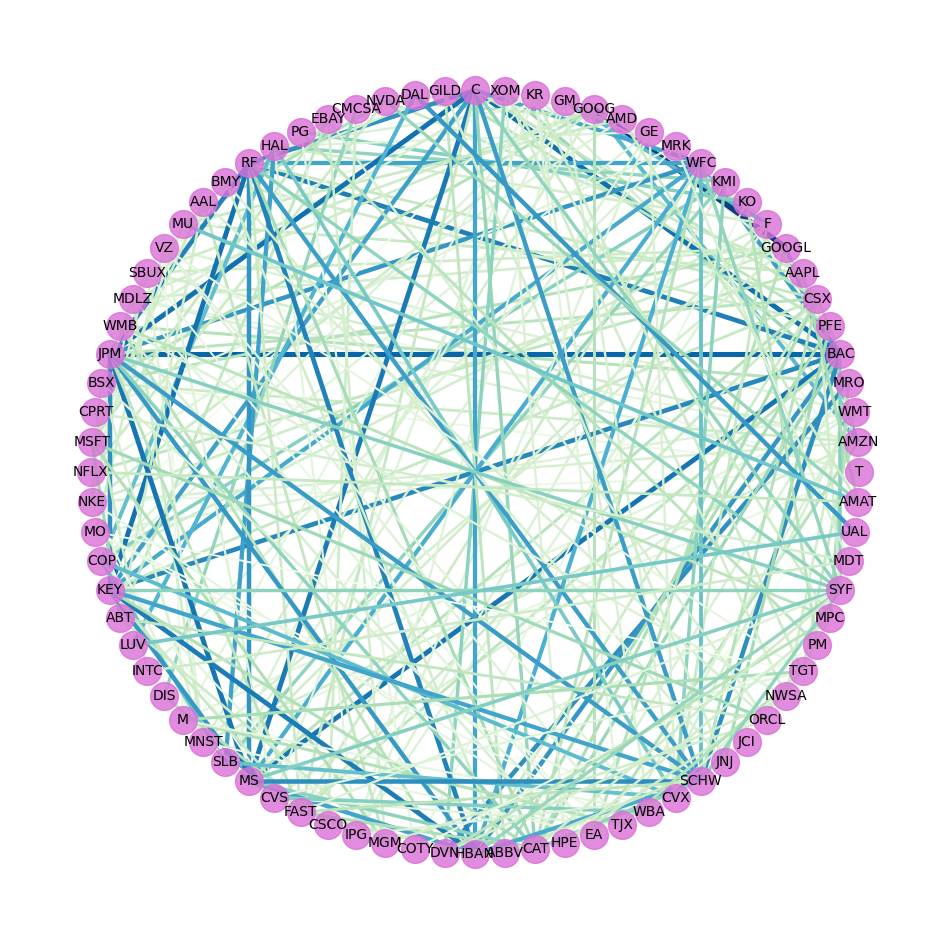

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
plot_graph(
    market_matrix_after_cuts,
    ax=ax,
    layout="circular",
    node_size=400,
    label_size=10
)

## Get the clusters and the companies

In [15]:
min_cluster_size = 5
weight_matrices_filtered = list(filter(lambda w_matrix: len(w_matrix) >= min_cluster_size, weight_matrices))

Cluster 1


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
WMT,Walmart,reports,Consumer Staples,Hypermarkets & Super Centers,"Bentonville, Arkansas",1982-08-31,104169,NaN
KR,Kroger Co.,reports,Consumer Staples,Food Retail,"Cincinnati, Ohio",NaN,56873,1883
VZ,Verizon Communications,reports,Communication Services,Integrated Telecommunication Services,"New York, New York",1983-11-30,732712,NaN
MO,Altria Group Inc,reports,Consumer Staples,Tobacco,"Richmond, Virginia",NaN,764180,1985
M,Macy's Inc.,reports,Consumer Discretionary,Department Stores,"Cincinnati, Ohio",NaN,794367,1929
CVS,CVS Health,reports,Health Care,Health Care Services,"Woonsocket, Rhode Island",NaN,64803,1996
TJX,TJX Companies Inc.,reports,Consumer Discretionary,Apparel Retail,"Framingham, Massachusetts",1985-09-30,109198,NaN
WBA,Walgreens Boots Alliance,reports,Consumer Staples,Drug Retail,"Deerfield, Illinois",1979-12-31,1618921,NaN
TGT,Target Corp.,reports,Consumer Discretionary,General Merchandise Stores,"Minneapolis, Minnesota",1976-12-31,27419,NaN


Cluster 2


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
PFE,Pfizer Inc.,reports,Health Care,Pharmaceuticals,"New York, New York",NaN,78003,1849
GILD,Gilead Sciences,reports,Health Care,Biotechnology,"Foster City, California",2004-07-01,882095,NaN
BMY,Bristol-Myers Squibb,reports,Health Care,Health Care Distributors,"New York, New York",NaN,14272,1989
ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
JNJ,Johnson & Johnson,reports,Health Care,Health Care Equipment,"New Brunswick, New Jersey",1973-06-30,200406,1886


Cluster 3


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
MRO,Marathon Oil Corp.,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1991-05-01,101778,NaN
XOM,Exxon Mobil Corp.,reports,Energy,Integrated Oil & Gas,"Irving, Texas",NaN,34088,1999
WMB,Williams Cos.,reports,Energy,Oil & Gas Storage & Transportation,"Tulsa, Oklahoma",1975-03-31,107263,NaN
DVN,Devon Energy Corp.,reports,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,1090012,NaN
HPE,Hewlett Packard Enterprise,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Palo Alto, California",2015-11-02,1645590,NaN
NWSA,News Corp. Class A,reports,Communication Services,Publishing,"New York, New York",2013-08-01,1564708,NaN
MPC,Marathon Petroleum,reports,Energy,Oil & Gas Refining & Marketing,"Findlay, Ohio",2011-07-01,1510295,NaN


Cluster 4


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
BAC,Bank of America Corp,reports,Financials,Diversified Banks,"Charlotte, North Carolina",1976-06-30,70858,NaN
CSX,CSX Corp.,reports,Industrials,Railroads,"Jacksonville, Florida",1967-09-30,277948,1980
WFC,Wells Fargo,reports,Financials,Diversified Banks,"San Francisco, California",1976-06-30,72971,NaN
C,Citigroup Inc.,reports,Financials,Diversified Banks,"New York, New York",1988-05-31,831001,NaN
RF,Regions Financial Corp.,reports,Financials,Regional Banks,"Birmingham, Alabama",1998-08-28,1281761,NaN
JPM,JPMorgan Chase & Co.,reports,Financials,Diversified Banks,"New York, New York",1975-06-30,19617,NaN
KEY,KeyCorp,reports,Financials,Regional Banks,"Cleveland, Ohio",1994-03-01,91576,NaN
MS,Morgan Stanley,reports,Financials,Investment Banking & Brokerage,"New York, New York",NaN,895421,1935
FAST,Fastenal Co,reports,Industrials,Building Products,"Winona, Minnesota",2009-09-15,815556,NaN
HBAN,Huntington Bancshares,reports,Financials,Regional Banks,"Columbus, Ohio",NaN,49196,1866


Cluster 5


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
EBAY,eBay Inc.,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"San Jose, California",NaN,1065088,1995
AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,1934
MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",1994-06-01,789019,1975
ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
MGM,MGM Resorts International,reports,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2017-07-26,789570,NaN
ORCL,Oracle Corp.,reports,Information Technology,Application Software,"Redwood Shores, California",1989-08-31,1341439,NaN


Cluster 6


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
F,Ford Motor,reports,Consumer Discretionary,Automobile Manufacturers,"Dearborn, Michigan",NaN,37996,1903
KMI,Kinder Morgan,reports,Energy,Oil & Gas Storage & Transportation,"Houston, Texas",2012-05-25,1506307,NaN
GE,General Electric,reports,Industrials,Industrial Conglomerates,"Boston, Massachusetts",NaN,40545,1892
GM,General Motors,reports,Consumer Discretionary,Automobile Manufacturers,"Detroit, Michigan",2013-06-06,1467858,NaN
HAL,Halliburton Co.,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",NaN,45012,1919
COP,ConocoPhillips,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",NaN,1163165,2002
SLB,Schlumberger Ltd.,reports,Energy,Oil & Gas Equipment & Services,"Curaçao, Kingdom of the Netherlands",1965-03-31,87347,1926
IPG,Interpublic Group,reports,Communication Services,Advertising,"New York, New York",1992-10-01,51644,NaN
CVX,Chevron Corp.,reports,Energy,Integrated Oil & Gas,"San Ramon, California",NaN,93410,1879


Cluster 7


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Sunnyvale, California",2017-03-20,2488,1969
NVDA,Nvidia Corporation,reports,Information Technology,Semiconductors,"Santa Clara, California",2001-11-30,1045810,NaN
MU,Micron Technology,reports,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125,NaN
NFLX,Netflix Inc.,reports,Communication Services,Movies & Entertainment,"Los Gatos, California",2010-12-20,1065280,1997
AMAT,Applied Materials Inc.,reports,Information Technology,Semiconductor Equipment,"Santa Clara, California",1995-03-16,6951,1967


Cluster 8


,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
T,AT&T Inc.,reports,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",1983-11-30,732717,1983
AMZN,Amazon.com Inc.,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724,1994
GOOGL,Alphabet Inc Class A,reports,Communication Services,Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
GOOG,Alphabet Inc Class C,reports,Communication Services,Interactive Media & Services,"Mountain View, California",2006-04-03,1652044,1998
SBUX,Starbucks Corp.,reports,Consumer Discretionary,Restaurants,"Seattle, Washington",NaN,829224,1971
MDLZ,Mondelez International,reports,Consumer Staples,Packaged Foods & Meats,"Northfield, Illinois",2012-10-02,1103982,NaN
BSX,Boston Scientific,reports,Health Care,Health Care Equipment,"Marlborough, Massachusetts[6]",1995-02-24,885725,NaN
NKE,Nike,reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Washington County, Oregon",1988-11-30,320187,NaN
MNST,Monster Beverage,reports,Consumer Staples,Soft Drinks,"Corona, California",2012-06-28,865752,NaN
EA,Electronic Arts,reports,Communication Services,Interactive Home Entertainment,"Redwood City, California",2002-07-22,712515,NaN


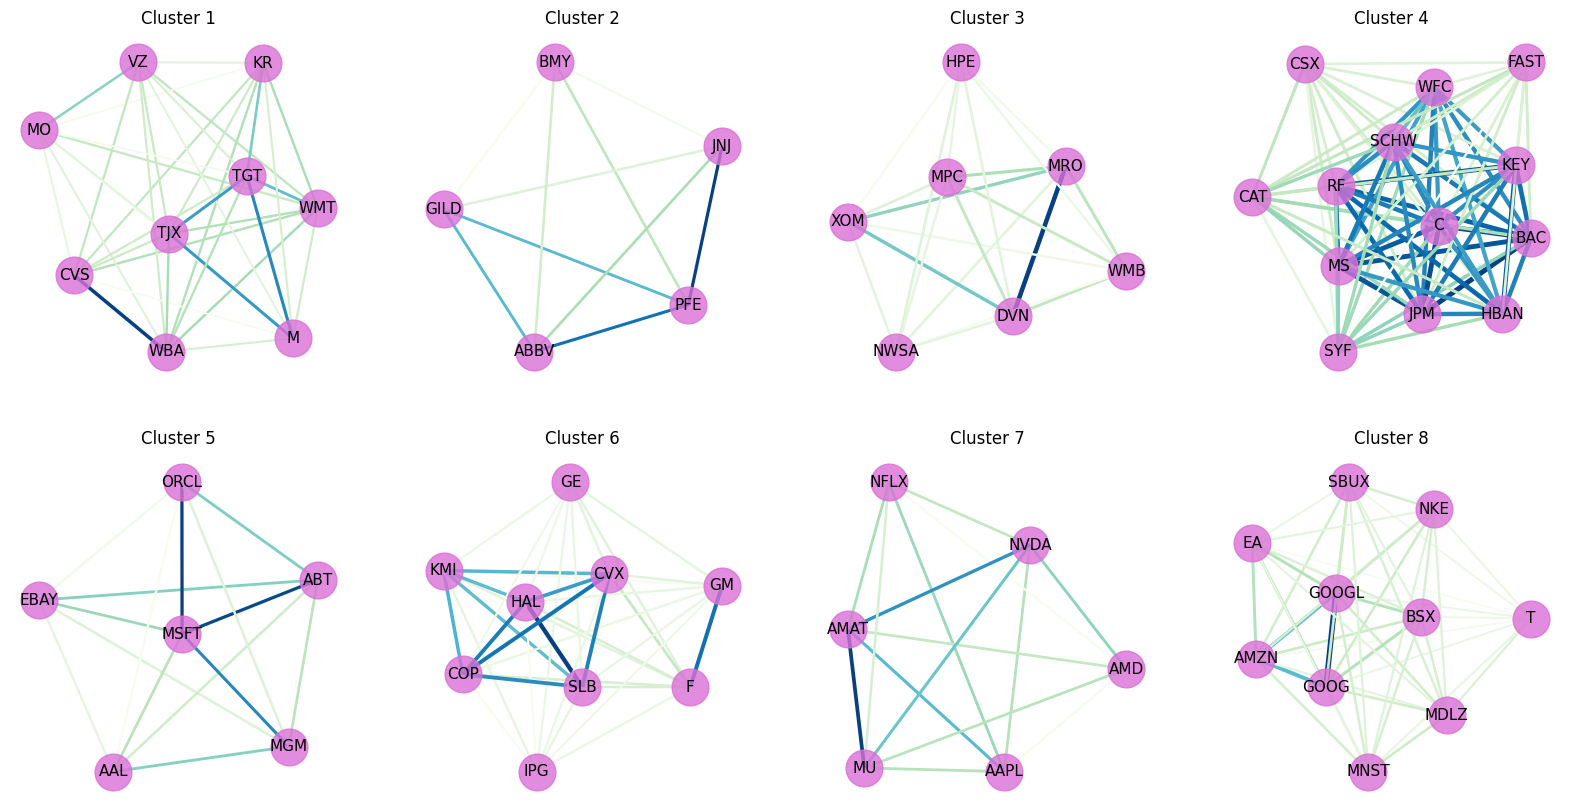

In [16]:
fig, axes = plt.subplots(2,4, figsize=(20,10))
for i, weight_matrix in enumerate(weight_matrices_filtered):
    print(f"Cluster {i+1}")
    display(info.loc[weight_matrix.columns])

    r = i // 4
    c = i % 4
    plot_graph(
        weight_matrix,
        ax=axes[r][c],
        node_size=700,
        label_size=11,
    )
    axes[r][c].set_title(f"Cluster {i+1}")


In [17]:
# Get the most correlated first 5 stocks for each cluster
def get_tickers(weight_matrix: pd.DataFrame, n=5) -> list:
    """Get the tickers of n most correlated stocks in the weight matrix."""
    return list(weight_matrix.sum().sort_values(ascending=False).index)[:n]

clusters = {
    f"cluster_{i + 1}": get_tickers(weight_matrix)
    for i, weight_matrix in enumerate(weight_matrices_filtered)
}
stocks_by_cluster_df = pd.DataFrame(clusters)
stocks_by_cluster_df


,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,TGT,PFE,DVN,BAC,MSFT,SLB,AMAT,GOOG
1,TJX,ABBV,MRO,JPM,ABT,CVX,MU,GOOGL
2,WBA,JNJ,XOM,MS,MGM,HAL,NVDA,AMZN
3,WMT,GILD,MPC,C,ORCL,COP,AAPL,BSX
4,CVS,BMY,WMB,RF,EBAY,KMI,NFLX,MDLZ


In [18]:
stocks_by_cluster_df.to_csv("../data/stocks_by_cluster.csv", index=False)